# Procesamiento de señales de Audio

In [1]:
import librosa
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
from pydub import AudioSegment

c:\Users\Antonio\Documents\GitHub\cdsi-portfolio\env\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
y, sr = librosa.load("cancion.wav")
Audio(data=y, rate=sr)

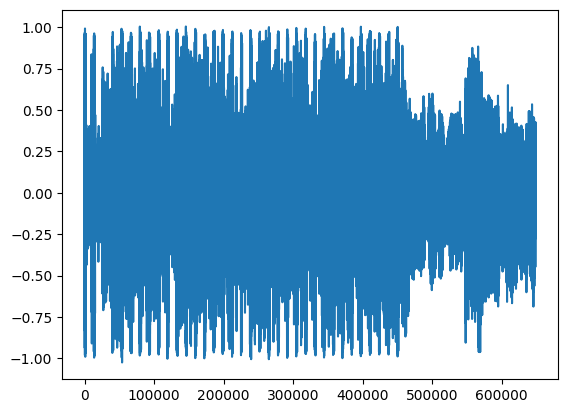

In [3]:
plt.plot(y)

### Recortar Audio

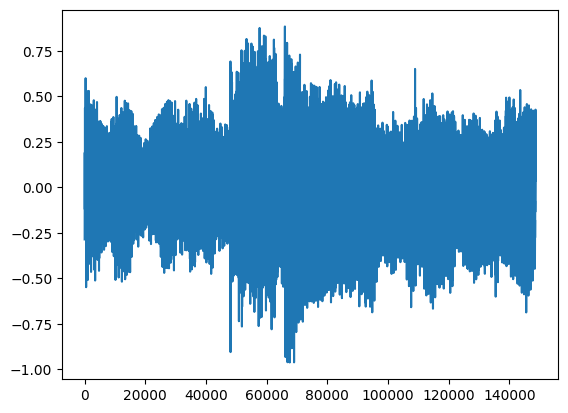

In [4]:
plt.plot(y[500000:650000])
Audio(data=y[500000:650000], rate=sr)

In [5]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(tempo)
print(beat_frames)

99.38401442307692
[  21   50   78  105  130  156  182  208  234  260  286  312  337  362
  389  415  441  466  492  518  544  570  596  622  647  673  699  725
  751  777  803  828  854  880  906  932  958  984 1010 1036 1060 1087
 1113 1139 1165 1191 1216]


In [6]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)

[ 0.48761905  1.16099773  1.81115646  2.43809524  3.0185941   3.62231293
  4.22603175  4.82975057  5.43346939  6.03718821  6.64090703  7.24462585
  7.82512472  8.40562358  9.03256236  9.63628118 10.24       10.82049887
 11.42421769 12.02793651 12.63165533 13.23537415 13.83909297 14.44281179
 15.02331066 15.62702948 16.2307483  16.83446712 17.43818594 18.04190476
 18.64562358 19.22612245 19.82984127 20.43356009 21.03727891 21.64099773
 22.24471655 22.84843537 23.4521542  24.05587302 24.61315193 25.2400907
 25.84380952 26.44752834 27.05124717 27.65496599 28.23546485]


### Espectogramas

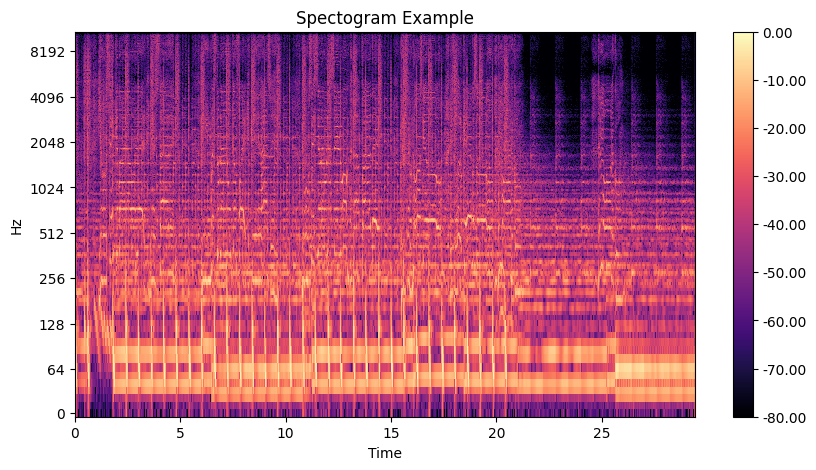

In [7]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Spectogram Example')
fig.colorbar(img, ax=ax, format=f'%0.2f')

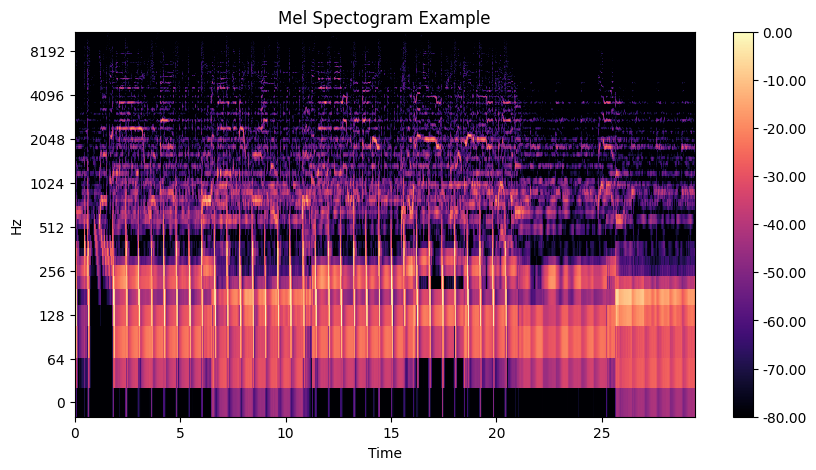

In [8]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128*2)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Mel Spectogram Example')
fig.colorbar(img, ax=ax, format=f'%0.2f')

### Filtros

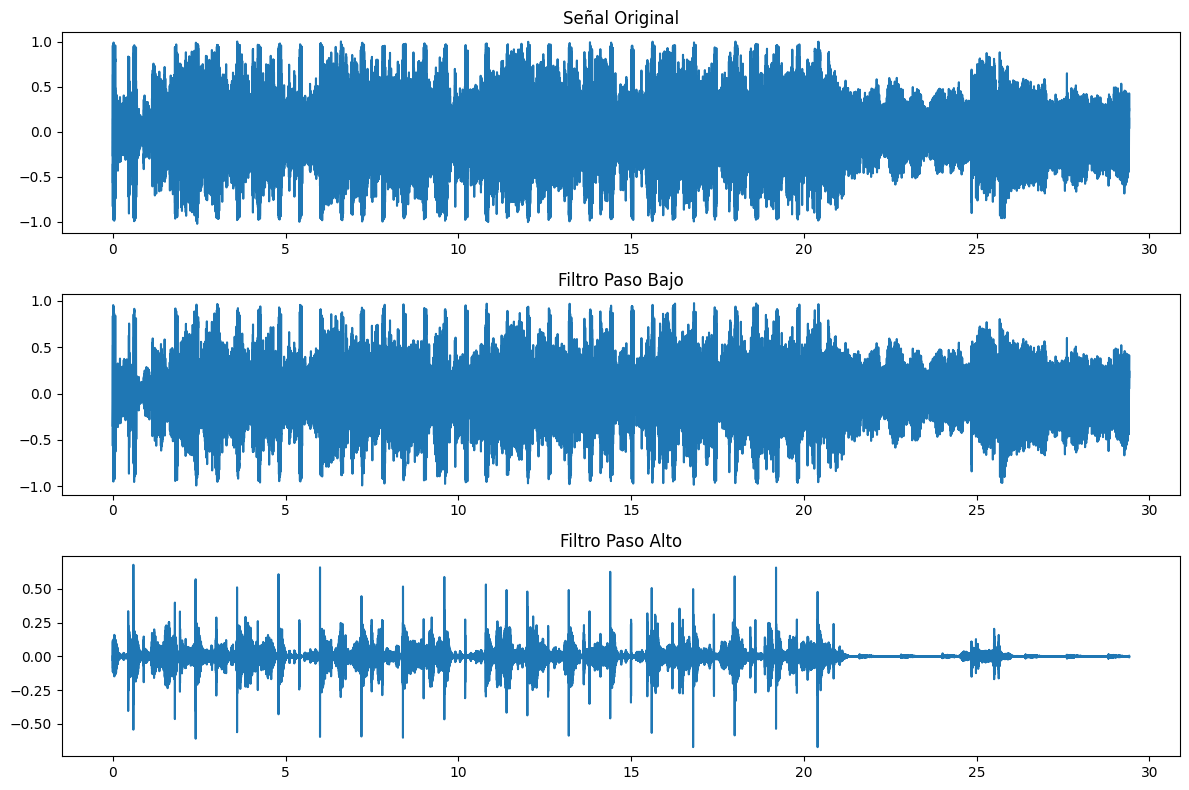

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa

# Diseñar un filtro Butterworth paso bajo
low_cutoff_frequency = 1000.0
order = 4
b_low, a_low = signal.butter(order, low_cutoff_frequency / (0.5 * sr), btype='low', analog=False)

# Diseñar un filtro Butterworth paso alto
high_cutoff_frequency = 5000.0
b_high, a_high = signal.butter(order, high_cutoff_frequency / (0.5 * sr), btype='high', analog=False)

# Aplicar el filtro paso bajo a la señal
filtered_low = signal.filtfilt(b_low, a_low, y)

# Aplicar el filtro paso alto a la señal
filtered_high = signal.filtfilt(b_high, a_high, y)

# Visualizar la señal original y las señales filtradas usando matplotlib.pyplot
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(np.arange(len(y)) / sr, y)
plt.title('Señal Original')

plt.subplot(3, 1, 2)
plt.plot(np.arange(len(filtered_low)) / sr, filtered_low)
plt.title('Filtro Paso Bajo')

plt.subplot(3, 1, 3)
plt.plot(np.arange(len(filtered_high)) / sr, filtered_high)
plt.title('Filtro Paso Alto')

plt.tight_layout()
plt.show()


##### Original

In [10]:
Audio(data=y, rate=sr)

##### Filtro Paso Bajo

In [11]:
Audio(data=filtered_low, rate=sr)

##### Filtro Paso Alto

In [12]:
Audio(data=filtered_high, rate=sr)

### Ganancia

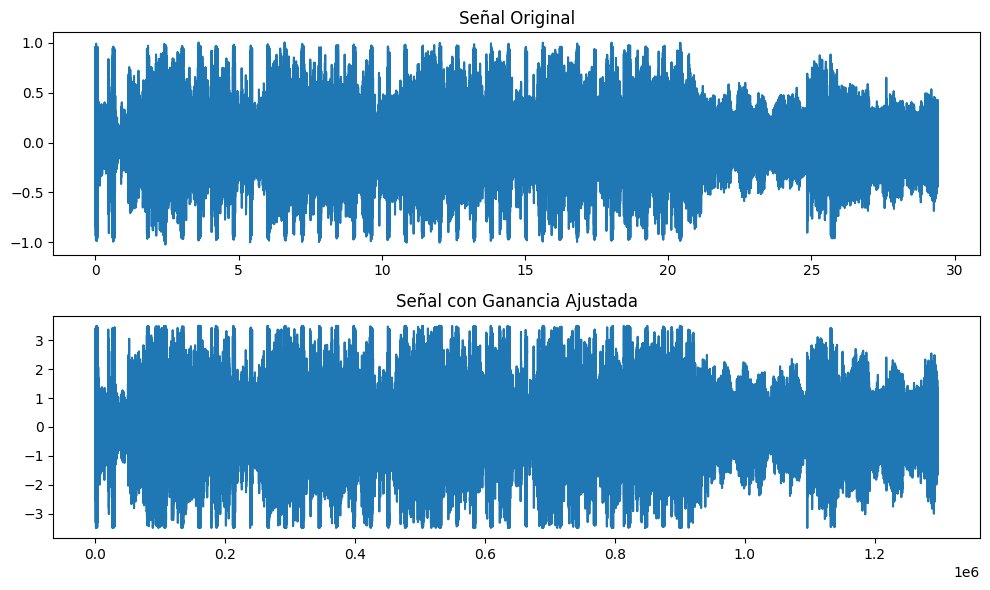

In [20]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Cargar la señal de audio
waveform, sample_rate = torchaudio.load("cancion.wav")

# Calcular la ganancia (ajusta este valor según sea necesario)
gain_factor = 3.5

# Aumentar la ganancia
waveform_gain = waveform * gain_factor

# Visualizar la señal original y la señal con ganancia ajustada
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y)) / sr, y)
plt.title('Señal Original')

plt.subplot(2, 1, 2)
plt.plot(waveform_gain[0].numpy())
plt.title('Señal con Ganancia Ajustada')

plt.tight_layout()
plt.show()


##### Original

In [ ]:
Audio(data=y, rate=sr)

#### Con Ganacia 

In [ ]:
Audio(data=waveform, rate=sample_rate)